0.0190239612953


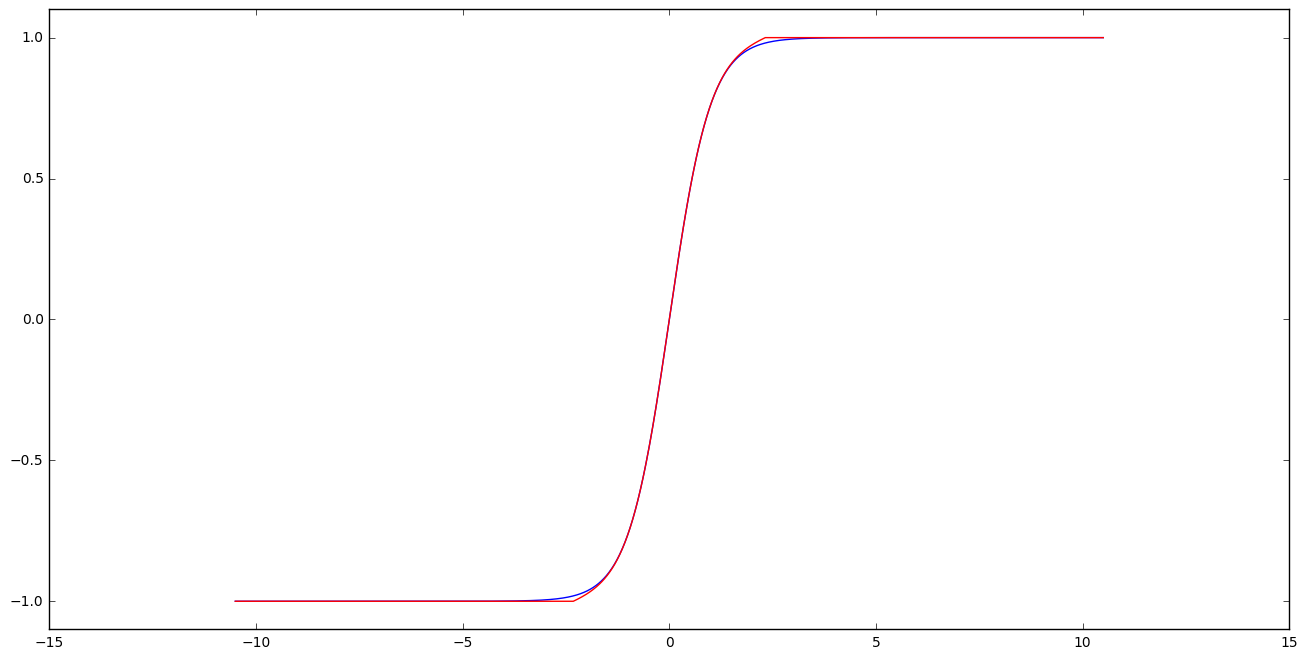

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

elems = np.linspace(-10.5, 10.5, num=1000)
tanh = np.tanh(elems.copy())

approx = []

def throttle(x):
    if x > 1.85:
        return 1
    elif x < -1.85:
        return -1
    else:
        return min(max(x, -1), 1)


def rec_approx_tanh(x, s, d, dmax=100):
    if d >= dmax:
        return (x**2)/s
    else:
        return x**2 / (s + (rec_approx_tanh(x, s+2, d+1, dmax)))

def approx_tanh(x):
    return x / (1+ rec_approx_tanh(x, 3, 0, 1))

                
for i in elems:
    approx.append(throttle(approx_tanh(i)))
approx = np.array(approx)
    
diff = np.absolute(approx - tanh)
print(np.max(diff))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.plot(elems, tanh, color='blue')
#ax.set_xlim([-10.5, 10.5])
ax.set_ylim([-1.1, 1.1])

ax.plot(elems, approx, color='red')

plt.show()